# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/moving.png?raw=true" width=800, align="left"/>

- 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
- 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
- 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# [미션 2] 구별 유동인구 분석

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [2]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [121]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [135]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [137]:
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: NanumGothic)
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'   # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())



### 기본 데이터: 1.2 seoul_moving_month_202408.csv

- 서울 시 구별 이동 2024년 8월 데이터
- 출처: https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

---

# 1. 데이터 불러오기

- 분석 대상 데이터를 불러와 데이터프레임으로 선언합니다.

### [참고] 데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)

- csv: pd.read_csv('파일이름.csv')
- txt: pd.read_csv('파일이름.csv', sep='구분자')
- xlsx: pd.read_excel('파일이름.xlsx')
- pickle: pd.read_pickle('파일이름.pkl')

## [실습1] 데이터 불러오기

- 대상 파일: 1.2 seoul_moving_month_202408.csv
- 불러온 데이터는 seoul_moving 데이터프레임으로 선언하세요.
- 데이터 불러올 때 참고할 사항 
    - 구분자(sep)는 ',' 입니다
    - UTF-8 인코더를 사용해 주세요(생략 가능)

In [8]:
# 데이터 불러오기
seoul_moving = pd.read_csv(path + '1.2 seoul_moving_month_202408.csv', sep=',', encoding='UTF-8')

# 확인
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202408,일,0,11010,11010,F,0,EE,136,28.01
1,202408,일,0,11010,11010,F,0,WH,7,28.02
2,202408,일,0,11010,11010,F,10,EE,55,23.96
3,202408,일,0,11010,11010,F,10,HH,84,11.83
4,202408,일,0,11010,11010,F,10,WH,166,5.94


**[데이터 소개]**
- 도착시간: 0 -> 00:00~00:59를 의미 
- 시구군 코드: 자치구 코드
- 성별: F(여성), M(남성)
- 나이: 0 ~ 9세, 10 ~ 79세 (5세 단위), 80세 이상으로 구분
- 이동유형: H(야간상주지), W(주간상주지), E(기타)
- 평균 이동 시간(분): 동일 열 내 이동인구의 월 단위 평균 이동 시간
- 이동인구(합): 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

In [11]:
# 데이터프레임 크기(행, 열) 확인
num_rows = seoul_moving.shape[0]
num_columns = seoul_moving.shape[1]
print(num_rows, num_columns)

30817445 10


---

# 2. 기본 정보 확인 및 전처리

- 분석 대상 테이터를 탐색하고 적절한 전처리를 수행합니다.

## [실습2] 기본 정보 확인

- seoul_moving 데이터프레임 정보를 확인하세요.- head(), tail(), info(), describe() 메서드 등을 활용해 보세요.

In [13]:
# head() 메서드로 상위 데이터 확인
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202408,일,0,11010,11010,F,0,EE,136,28.01
1,202408,일,0,11010,11010,F,0,WH,7,28.02
2,202408,일,0,11010,11010,F,10,EE,55,23.96
3,202408,일,0,11010,11010,F,10,HH,84,11.83
4,202408,일,0,11010,11010,F,10,WH,166,5.94


**[0번 열의 의미]**

~~~
"2024년 8월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고,
 E(기타)에서 E(기타)로 이동한 0 ~ 9세 여성은 총 28.01명이며 이들의 평균 이동시간은 136분이다"
~~~

In [15]:
# tail() 메서드로 하위 데이터 확인
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
30817440,202408,토,23,39000,11250,M,45,EH,184,3.16
30817441,202408,토,23,39000,11250,M,50,EH,173,6.61
30817442,202408,토,23,39000,11250,M,55,EH,164,6.55
30817443,202408,토,23,39000,11250,M,60,EW,207,3.52
30817444,202408,토,23,39000,11250,M,65,EE,155,4.08


In [17]:
# info() 메서드로 열 이름, 데이터 개수, 데이터 형식 등 확인
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30817445 entries, 0 to 30817444
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.3+ GB


In [19]:
# 표시 형식 변경
pd.set_option('display.float_format', '{:.4f}'.format)

In [21]:
# describe() 메서드로 기술통계정보 확인
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,30817445.0000,30817445.0000,30817445.0000,30817445.0000,30817445.0000,30817445.0000
mean,202408.0000,13.6159,17199.4540,17269.1410,43.0756,94.4543
std,0.0000,5.8779,9073.1107,9084.3081,18.1757,79.1972
min,202408.0000,0.0000,11010.0000,11010.0000,0.0000,1.0000
25%,202408.0000,10.0000,11110.0000,11110.0000,30.0000,49.0000
50%,202408.0000,14.0000,11200.0000,11200.0000,45.0000,75.0000
75%,202408.0000,18.0000,31021.0000,31021.0000,55.0000,113.0000
max,202408.0000,23.0000,39000.0000,39000.0000,80.0000,3644.0000


In [23]:
# 표시 형식 초기화
pd.reset_option('display.float_format')

## [실습3] 결측치 처리

- NaN이 아닌 결측치를 처리해 보세요.
- '이동인구(합)' 열 데이터 형식은 현재 object, 즉 str 형입니다.
- 3명 미만 이동인구 합은 개인정보 비식별화를 위해 * 처리 되어 있기 때문입니다.

In [25]:
# '이동인구(합)' 값별 갯수 확인
# 참고: value_counts() 메서드 사용
moving_people_count = seoul_moving['이동인구(합)'].value_counts()
print(moving_people_count)

이동인구(합)
*          3946178
6.05        469786
3.30        412951
3.29        290769
3.31        239926
            ...   
603.05           1
977.58           1
885.38           1
1105.71          1
765.75           1
Name: count, Length: 143893, dtype: int64


- 그러므로 * 로 저장된 값을 나름의 기준으로 변경하세요.(예: '1,5')

In [27]:
# '이동인구(합)' 열 * 값을 '1.5'로 변경
# 참고: replace() 메서드 사용
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].replace('*', 1.5)

# 확인
moving_people_count = seoul_moving['이동인구(합)'].value_counts()
print(moving_people_count)


이동인구(합)
1.5        3946178
6.05        469786
3.30        412951
3.29        290769
3.31        239926
            ...   
603.05           1
977.58           1
885.38           1
1105.71          1
765.75           1
Name: count, Length: 143893, dtype: int64


- '이동인구(합)' 열의 데이터 형식을 float 형으로 변경하세요 

In [29]:
# '이동인구(합)' 열 데이터 형식을 float으로 변경
# 참고: astype() 메서드 사용
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)

# 확인
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30817445 entries, 0 to 30817444
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.3+ GB


## [실습4] 범주형 데이터 확인

- '이동유형', '요일', '성별' 열의 범줏값 개수를 확인하세요.


In [31]:
# '이동유형' 범줏값 개수
# 참고: value_counts() 메서드 사용
seoul_moving['이동유형'].value_counts()

이동유형
EH    6184889
HE    5979641
EE    5601729
WH    3118329
WE    2953729
HW    2737553
EW    2466619
WW    1109238
HH     665718
Name: count, dtype: int64

In [33]:
# '요일' 범줏값 개수
# 참고: value_counts() 메서드 사용
seoul_moving['요일'].value_counts()

요일
금    4869700
토    4862970
목    4719375
수    4191807
화    4121848
월    4090609
일    3961136
Name: count, dtype: int64

- 아래 달력을 보고 2024년 8월 요일 개수를 확인하세요.

<img src = "https://github.com/Jangrae/img/blob/master/202408.png?raw=true" width=200, align="left"/>

In [35]:
# '성별' 범줏값 개수
# 참고: value_counts() 메서드 사용
seoul_moving['성별'].value_counts()

성별
M    17206256
F    13611189
Name: count, dtype: int64

## [실습5] 서울 지역 데이터 준비

- 우리는 서울시의 데이터만 필요합니다.
    - 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)
- 출발과 도착이 모두 서울인 데이터 ('출발 시군구 코드' < 20000 & '도착 시군구 코드' < 20000)만 추출하세요.
- 추출된 결과를 기존 seoul_moving 데이터프레임으로 다시 선언하세요.

In [41]:
# 서울지역 데이터 추출
# 참고: df = df.loc[(조건1) & (조건)] 형태 구문 사용
seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]

# 결과 확인
seoul_moving['출발 시군구 코드'].value_counts()
seoul_moving['도착 시군구 코드'].value_counts()

도착 시군구 코드
11230    575948
11220    520043
11190    513706
11020    503079
11140    500393
11010    494158
11240    480754
11060    475759
11040    475689
11080    470652
11030    465927
11050    443165
11130    443145
11200    441769
11160    438937
11210    438109
11110    425304
11170    409844
11070    398255
11250    382549
11120    381713
11090    370860
11150    367150
11100    340593
11180    302434
Name: count, dtype: int64

- 인덱스를 초기화하세요(단, 기존 인덱스를 버리세요).

In [43]:
# 인덱스 초기화
seoul_moving = seoul_moving.reset_index(drop=True)

# 결과 확인
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202408,일,0,11010,11010,F,0,EE,136,28.01
1,202408,일,0,11010,11010,F,0,WH,7,28.02
2,202408,일,0,11010,11010,F,10,EE,55,23.96
3,202408,일,0,11010,11010,F,10,HH,84,11.83
4,202408,일,0,11010,11010,F,10,WH,166,5.94
...,...,...,...,...,...,...,...,...,...,...
11059930,202408,토,23,11250,11250,M,80,HE,55,37.86
11059931,202408,토,23,11250,11250,M,80,HH,92,18.87
11059932,202408,토,23,11250,11250,M,80,HW,21,28.40
11059933,202408,토,23,11250,11250,M,80,WH,44,113.71


**[서울 구별 코드]**

~~~
11010: 종로구    11020: 중구    11030: 용산구   11040: 성동구    11050: 광진구
11060: 동대문구  11070: 중랑구  11080: 성북구   11090: 강북구    11100: 도봉구
11110: 노원구    11120:	은평구  11130: 서대문구 11140: 마포구    11150: 양천구
11160: 강서구    11170: 구로구  11180: 금천구   11190: 영등포구  11200:	동작구
11210: 관악구    11220: 서초구  11230: 강남구   11240: 송파구    11250: 강동구
~~~

- 다음 코드를 필히 실행하여 출발/도착 시구군 코드를 출발/도착 자치구 이름으로 변경하세요.

In [45]:
# 구 코드를 구 이름으로 변경
seoul_moving['출발 자치구'] = seoul_moving['출발 시군구 코드'].map({
      11010: '종로구',   11020: '중구',   11030: '용산구',   11040: '성동구',   11050: '광진구',
      11060: '동대문구', 11070: '중랑구', 11080: '성북구',   11090: '강북구',   11100: '도봉구',
      11110: '노원구',   11120:	'은평구', 11130: '서대문구', 11140: '마포구',   11150: '양천구',
      11160: '강서구',   11170: '구로구', 11180: '금천구',   11190: '영등포구', 11200: '동작구',
      11210: '관악구',   11220: '서초구', 11230: '강남구',   11240: '송파구',   11250: '강동구'})

seoul_moving['도착 자치구'] = seoul_moving['도착 시군구 코드'].map({
      11010: '종로구',   11020: '중구',   11030: '용산구',   11040: '성동구',   11050: '광진구',
      11060: '동대문구', 11070: '중랑구', 11080: '성북구',   11090: '강북구',   11100: '도봉구',
      11110: '노원구',   11120:	'은평구', 11130: '서대문구', 11140: '마포구',   11150: '양천구',
      11160: '강서구',   11170: '구로구', 11180: '금천구',   11190: '영등포구', 11200: '동작구',
      11210: '관악구',   11220: '서초구', 11230: '강남구',   11240: '송파구',   11250: '강동구'})

# '출발/도착 시구군 코드' 열 제거
seoul_moving.drop(['출발 시군구 코드', '도착 시군구 코드'], axis=1, inplace=True)

# 확인
seoul_moving.head()

,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발 자치구,도착 자치구
0,202408,일,0,F,0,EE,136,28.01,종로구,종로구
1,202408,일,0,F,0,WH,7,28.02,종로구,종로구
2,202408,일,0,F,10,EE,55,23.96,종로구,종로구
3,202408,일,0,F,10,HH,84,11.83,종로구,종로구
4,202408,일,0,F,10,WH,166,5.94,종로구,종로구


In [160]:
seoul_moving.shape

(11059935, 10)

## [실습6] 구별 유입/유출 인구 분석

- 구별로 집계하여 다음 내용을 확인하세요.
    - 유출 인구가 제일 많은 구는?
    - 유출 인구가 제일 적은 구는?
    - 유입 인구가 제일 많은 구는?
    - 유입 인구가 제일 적은 구는?

In [51]:
# 유출이 제일 많은 구와 적은 구는? 강남구, 금천구
# 참고: groupby() 메서드 사용

# 유출 인구 계산 (출발 자치구별 이동인구(합) 합산)
유출인구 = seoul_moving.groupby('출발 자치구')['이동인구(합)'].sum()

# 유출 인구가 제일 많은 구와 적은 구
유출_최대구 = 유출인구.idxmax(), 유출인구.max()
유출_최소구 = 유출인구.idxmin(), 유출인구.min()

# 결과 출력
print(f"유출 인구가 제일 많은 구: {유출_최대구[0]} ({유출_최대구[1]}명)")
print(f"유출 인구가 제일 적은 구: {유출_최소구[0]} ({유출_최소구[1]}명)")

유출 인구가 제일 많은 구: 강남구 (51858648.64명)
유출 인구가 제일 적은 구: 금천구 (9331396.53명)


In [49]:
# 유입이 제일 많은 구와 적은 구는? 강남구, 금천구 
# 참고: groupby() 메서드 사용

# 유입 인구 계산 (도착 자치구별 이동인구(합) 합산)
유입인구 = seoul_moving.groupby('도착 자치구')['이동인구(합)'].sum()

# 유입 인구가 제일 많은 구와 적은 구
유입_최대구 = 유입인구.idxmax(), 유입인구.max()
유입_최소구 = 유입인구.idxmin(), 유입인구.min()

# 결과 출력
print(f"유입 인구가 제일 많은 구: {유입_최대구[0]} ({유입_최대구[1]}명)")
print(f"유입 인구가 제일 적은 구: {유입_최소구[0]} ({유입_최소구[1]}명)")

유입 인구가 제일 많은 구: 강남구 (51766253.76명)
유입 인구가 제일 적은 구: 금천구 (9314767.58명)


## [실습7] 구별 이동 시간, 이동 인구 분석

- '도착 자치구' 열을 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)' 평균을 집계하세요.
- 평균 집계 결과를 df_mean 데이터프레임으로 선언하세요.

In [53]:
# 평균 집계 --> df_mean 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정
df_mean = seoul_moving.groupby('도착 자치구', as_index=False).agg({'평균 이동 시간(분)': 'mean', '이동인구(합)': 'mean'})

# 확인
df_mean

,도착 자치구,평균 이동 시간(분),이동인구(합)
0,강남구,65.220874,89.880083
1,강동구,71.135695,67.088111
2,강북구,65.258796,38.290780
3,강서구,70.107829,59.547527
4,관악구,63.064536,47.985346
5,광진구,60.205262,44.344913
6,구로구,63.983186,43.321989
7,금천구,65.848807,30.799340
8,노원구,66.705984,52.344090
9,도봉구,66.683308,36.915026


- '도착 자치구' 열을 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)' 합을 집계하세요.
- 합 집계 결과를 df_sum 데이터프레임으로 선언하세요.

In [55]:
# 합 집계 --> df_sum 데이터프레임으로 선언
# 참고: groupby() 메서드 사용, as_index=False 지정
df_sum = seoul_moving.groupby('도착 자치구', as_index=False).agg({'평균 이동 시간(분)': 'sum', '이동인구(합)': 'sum'})

# 확인
df_sum

,도착 자치구,평균 이동 시간(분),이동인구(합)
0,강남구,37563832,51766253.76
1,강동구,27212889,25664489.79
2,강북구,24201877,14200518.80
3,강서구,30772920,26137612.75
4,관악구,27629141,21022812.01
5,광진구,26680865,19652113.55
6,구로구,26223125,17755257.26
7,금천구,19914918,9314767.58
8,노원구,28370322,22262150.94
9,도봉구,22711868,12572999.34


- 다음과 같이 df_sum 데이터프레임의 열 이름을 변경하세요.
    - '평균 이동 시간(분)' --> '총 이동 시간', '이동인구(합)' --> '총 이동인구'

In [59]:
# 열 이름 변경: '평균 이동 시간(분)' --> '총 이동 시간','이동인구(합)' --> '총 이동인구'
# 참고: rename() 메서드 사용
df_sum.rename(columns={'평균 이동 시간(분)': '총 이동 시간'}, inplace=True)
df_sum.rename(columns={'이동인구(합)': '총 이동인구'}, inplace=True)

# 확인
df_sum

,도착 자치구,총 이동 시간,총 이동인구
0,강남구,37563832,51766253.76
1,강동구,27212889,25664489.79
2,강북구,24201877,14200518.80
3,강서구,30772920,26137612.75
4,관악구,27629141,21022812.01
5,광진구,26680865,19652113.55
6,구로구,26223125,17755257.26
7,금천구,19914918,9314767.58
8,노원구,28370322,22262150.94
9,도봉구,22711868,12572999.34


- df_mean, df_sum 두 데이터프레임을 조인(merge) 하여 df_seoul_moving 데이터프레임을 선언하세요.

In [61]:
# df_mean, df_sum 데이터프레임 조인(merge)
# 참고: '도착 자치구' 열이 조인 기준, how='inner' 지정
df_seoul_moving = pd.merge(df_mean, df_sum, on='도착 자치구', how='inner', suffixes=('_mean', '_sum'))

# 확인
df_seoul_moving

,도착 자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01
5,광진구,60.205262,44.344913,26680865,19652113.55
6,구로구,63.983186,43.321989,26223125,17755257.26
7,금천구,65.848807,30.799340,19914918,9314767.58
8,노원구,66.705984,52.344090,28370322,22262150.94
9,도봉구,66.683308,36.915026,22711868,12572999.34


- df_seoul_moving 데이터프레임의 '도착 자치구' 열 이름을 '자치구'로 변경하세요.

In [64]:
# 열 이름 변경
df_seoul_moving.rename(columns={'도착 자치구': '자치구'}, inplace=True)

# 확인
df_seoul_moving

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01
5,광진구,60.205262,44.344913,26680865,19652113.55
6,구로구,63.983186,43.321989,26223125,17755257.26
7,금천구,65.848807,30.799340,19914918,9314767.58
8,노원구,66.705984,52.344090,28370322,22262150.94
9,도봉구,66.683308,36.915026,22711868,12572999.34


- df_seoul_moving 데이터프레임을 df_seoul_moving.csv 파일로 저장하세요.

In [66]:
# csv 파일로 저장 (파일명: df_seoul_moving.csv)
# 참고: to_csv() 메서드를 사용, index=False 지정 
df_seoul_moving.to_csv(path + 'df_seoul_moving.csv', index=False)

---

In [68]:
# 데이터 확인
df_seoul_moving

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01
5,광진구,60.205262,44.344913,26680865,19652113.55
6,구로구,63.983186,43.321989,26223125,17755257.26
7,금천구,65.848807,30.799340,19914918,9314767.58
8,노원구,66.705984,52.344090,28370322,22262150.94
9,도봉구,66.683308,36.915026,22711868,12572999.34


In [150]:
print(df_seoul_moving.dtypes)

자치구             object
평균 이동 시간(분)    float64
이동인구(합)        float64
총 이동 시간          int64
총 이동인구         float64
dtype: object


# 3. 데이터 분석

- 다양한 분석 과정을 통해 인사이트를 도출하세요.

## [실습8] 시각화 분석

- 다양한 열를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

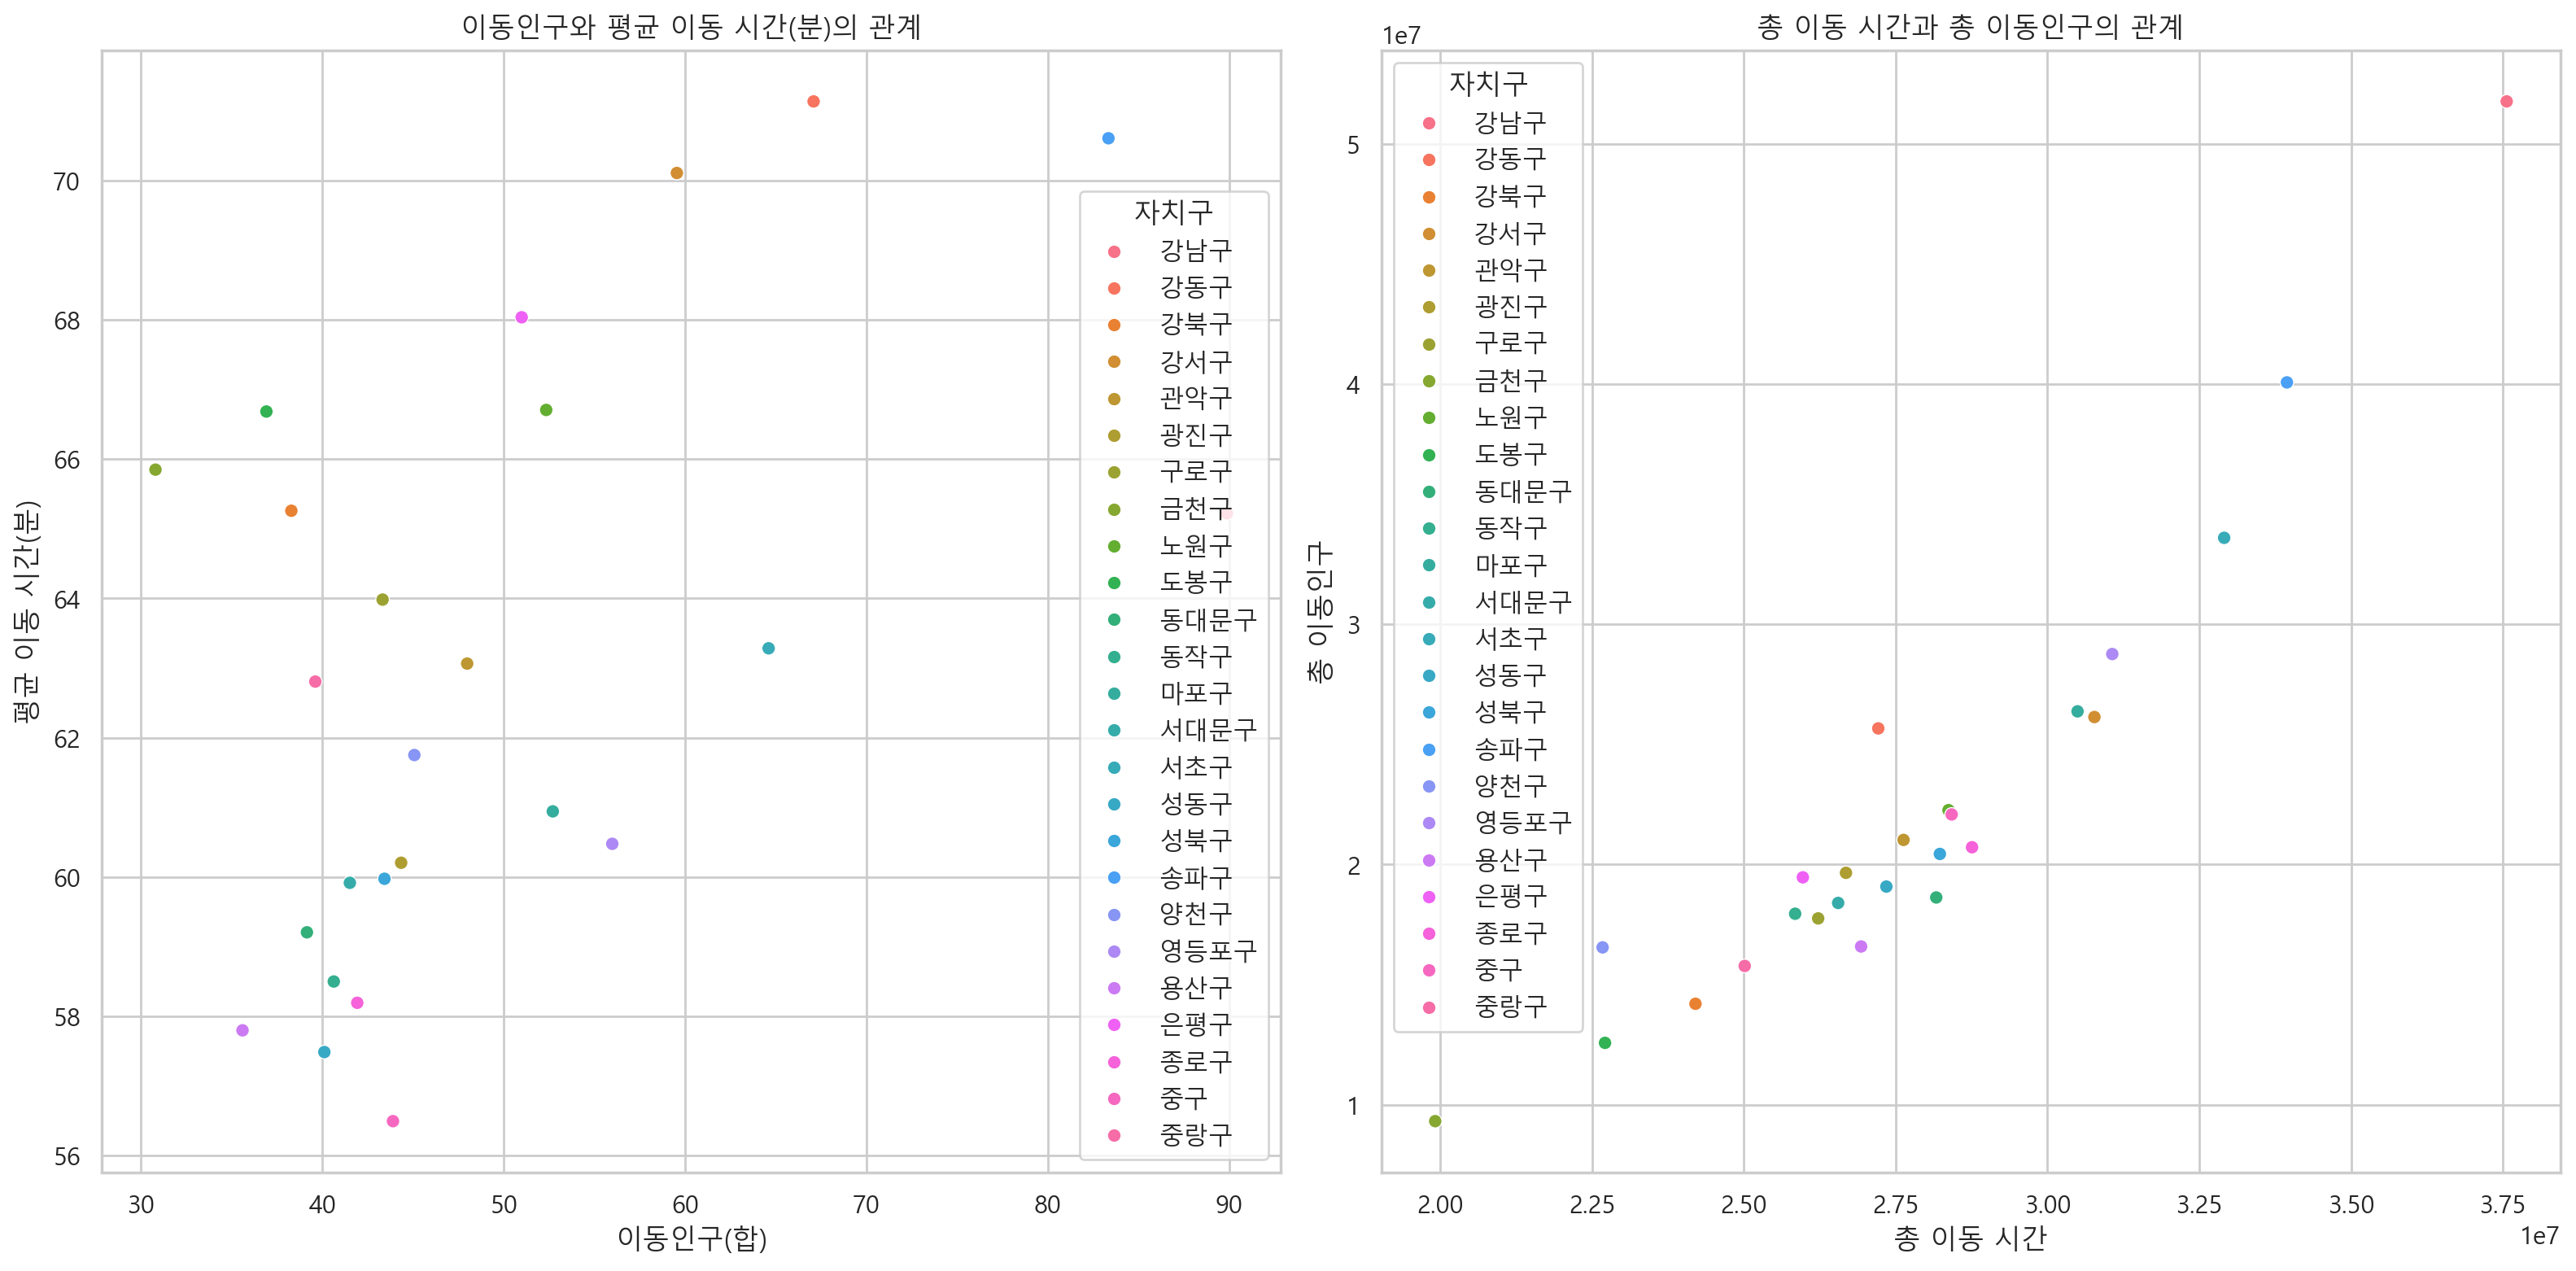

In [156]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 산점도: 이동인구 vs 평균이동시간
sns.scatterplot(x='이동인구(합)', y='평균 이동 시간(분)', hue='자치구', data=df_seoul_moving, ax=axes[0])
axes[0].set_title('이동인구와 평균 이동 시간(분)의 관계')

# 두 번째 산점도: 총 이동 시간 vs 총 이동 인구
sns.scatterplot(x='총 이동 시간', y='총 이동인구', hue='자치구', data=df_seoul_moving, ax=axes[1])
axes[1].set_title('총 이동 시간과 총 이동인구의 관계')

# 레이아웃 조정
plt.tight_layout()
plt.show()

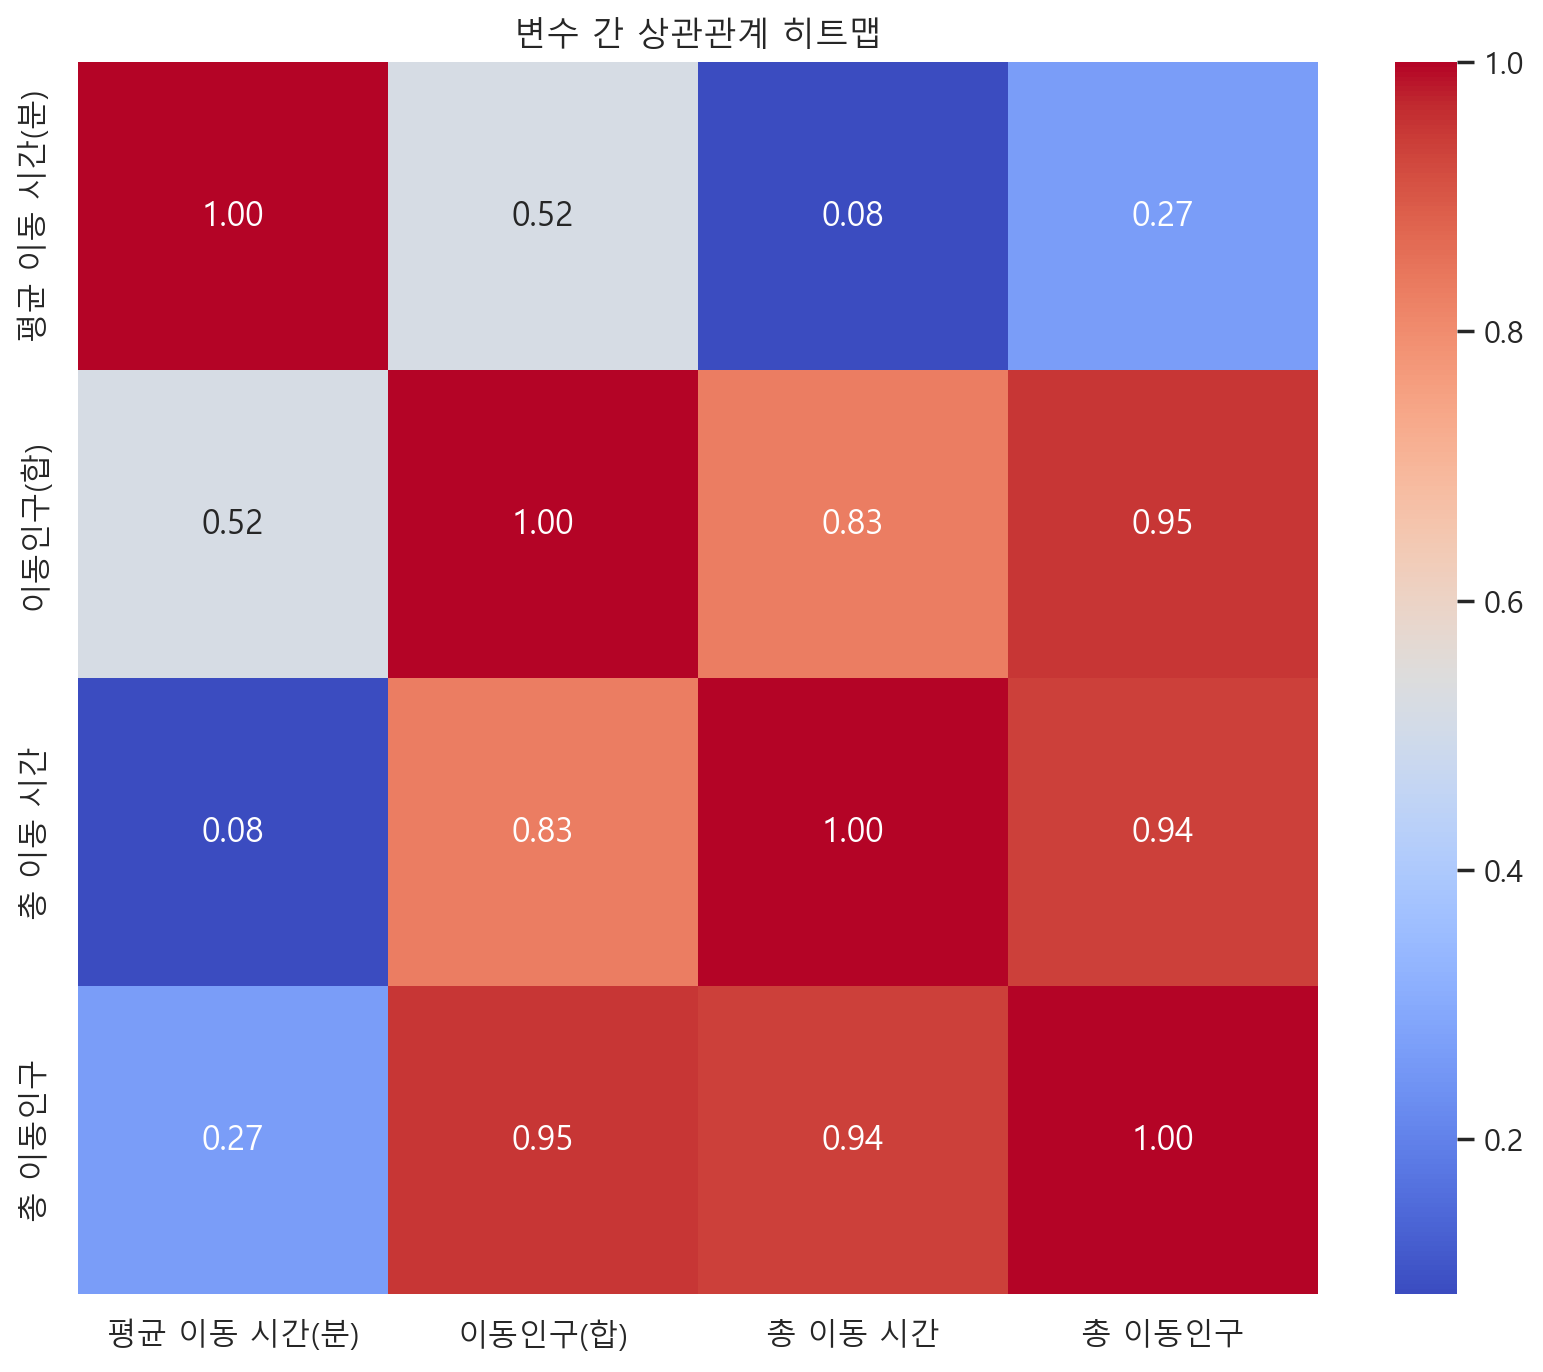

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# '자치구' 컬럼을 제외하고 상관관계 행렬 계산
correlation_matrix = df_seoul_moving.drop(columns=['자치구']).corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('변수 간 상관관계 히트맵')
plt.show()

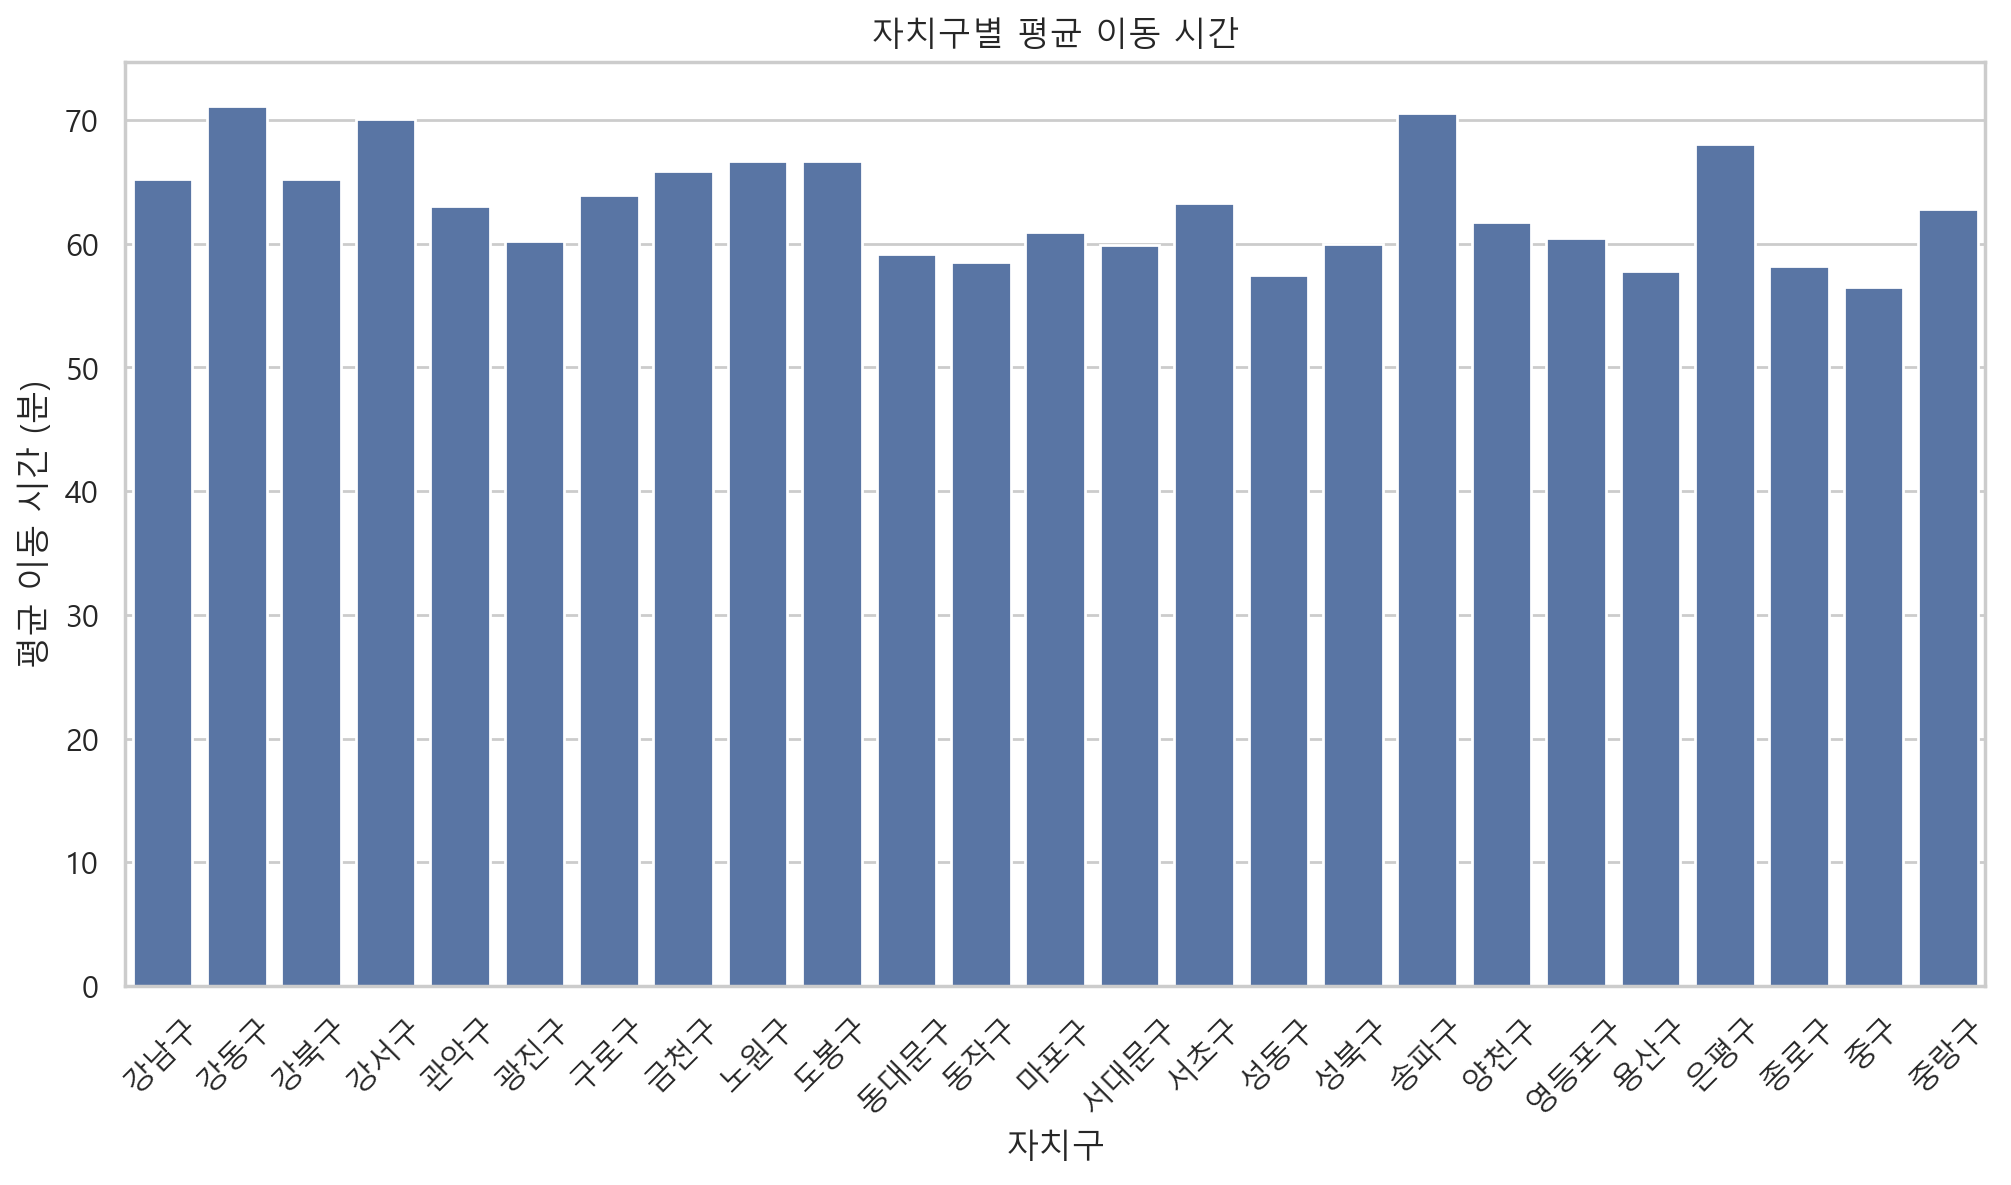

In [139]:
# 자치구별 평균 이동 시간 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='평균 이동 시간(분)', data=df_seoul_moving)
plt.xticks(rotation=45)
plt.title('자치구별 평균 이동 시간')
plt.xlabel('자치구')
plt.ylabel('평균 이동 시간 (분)')
plt.show()

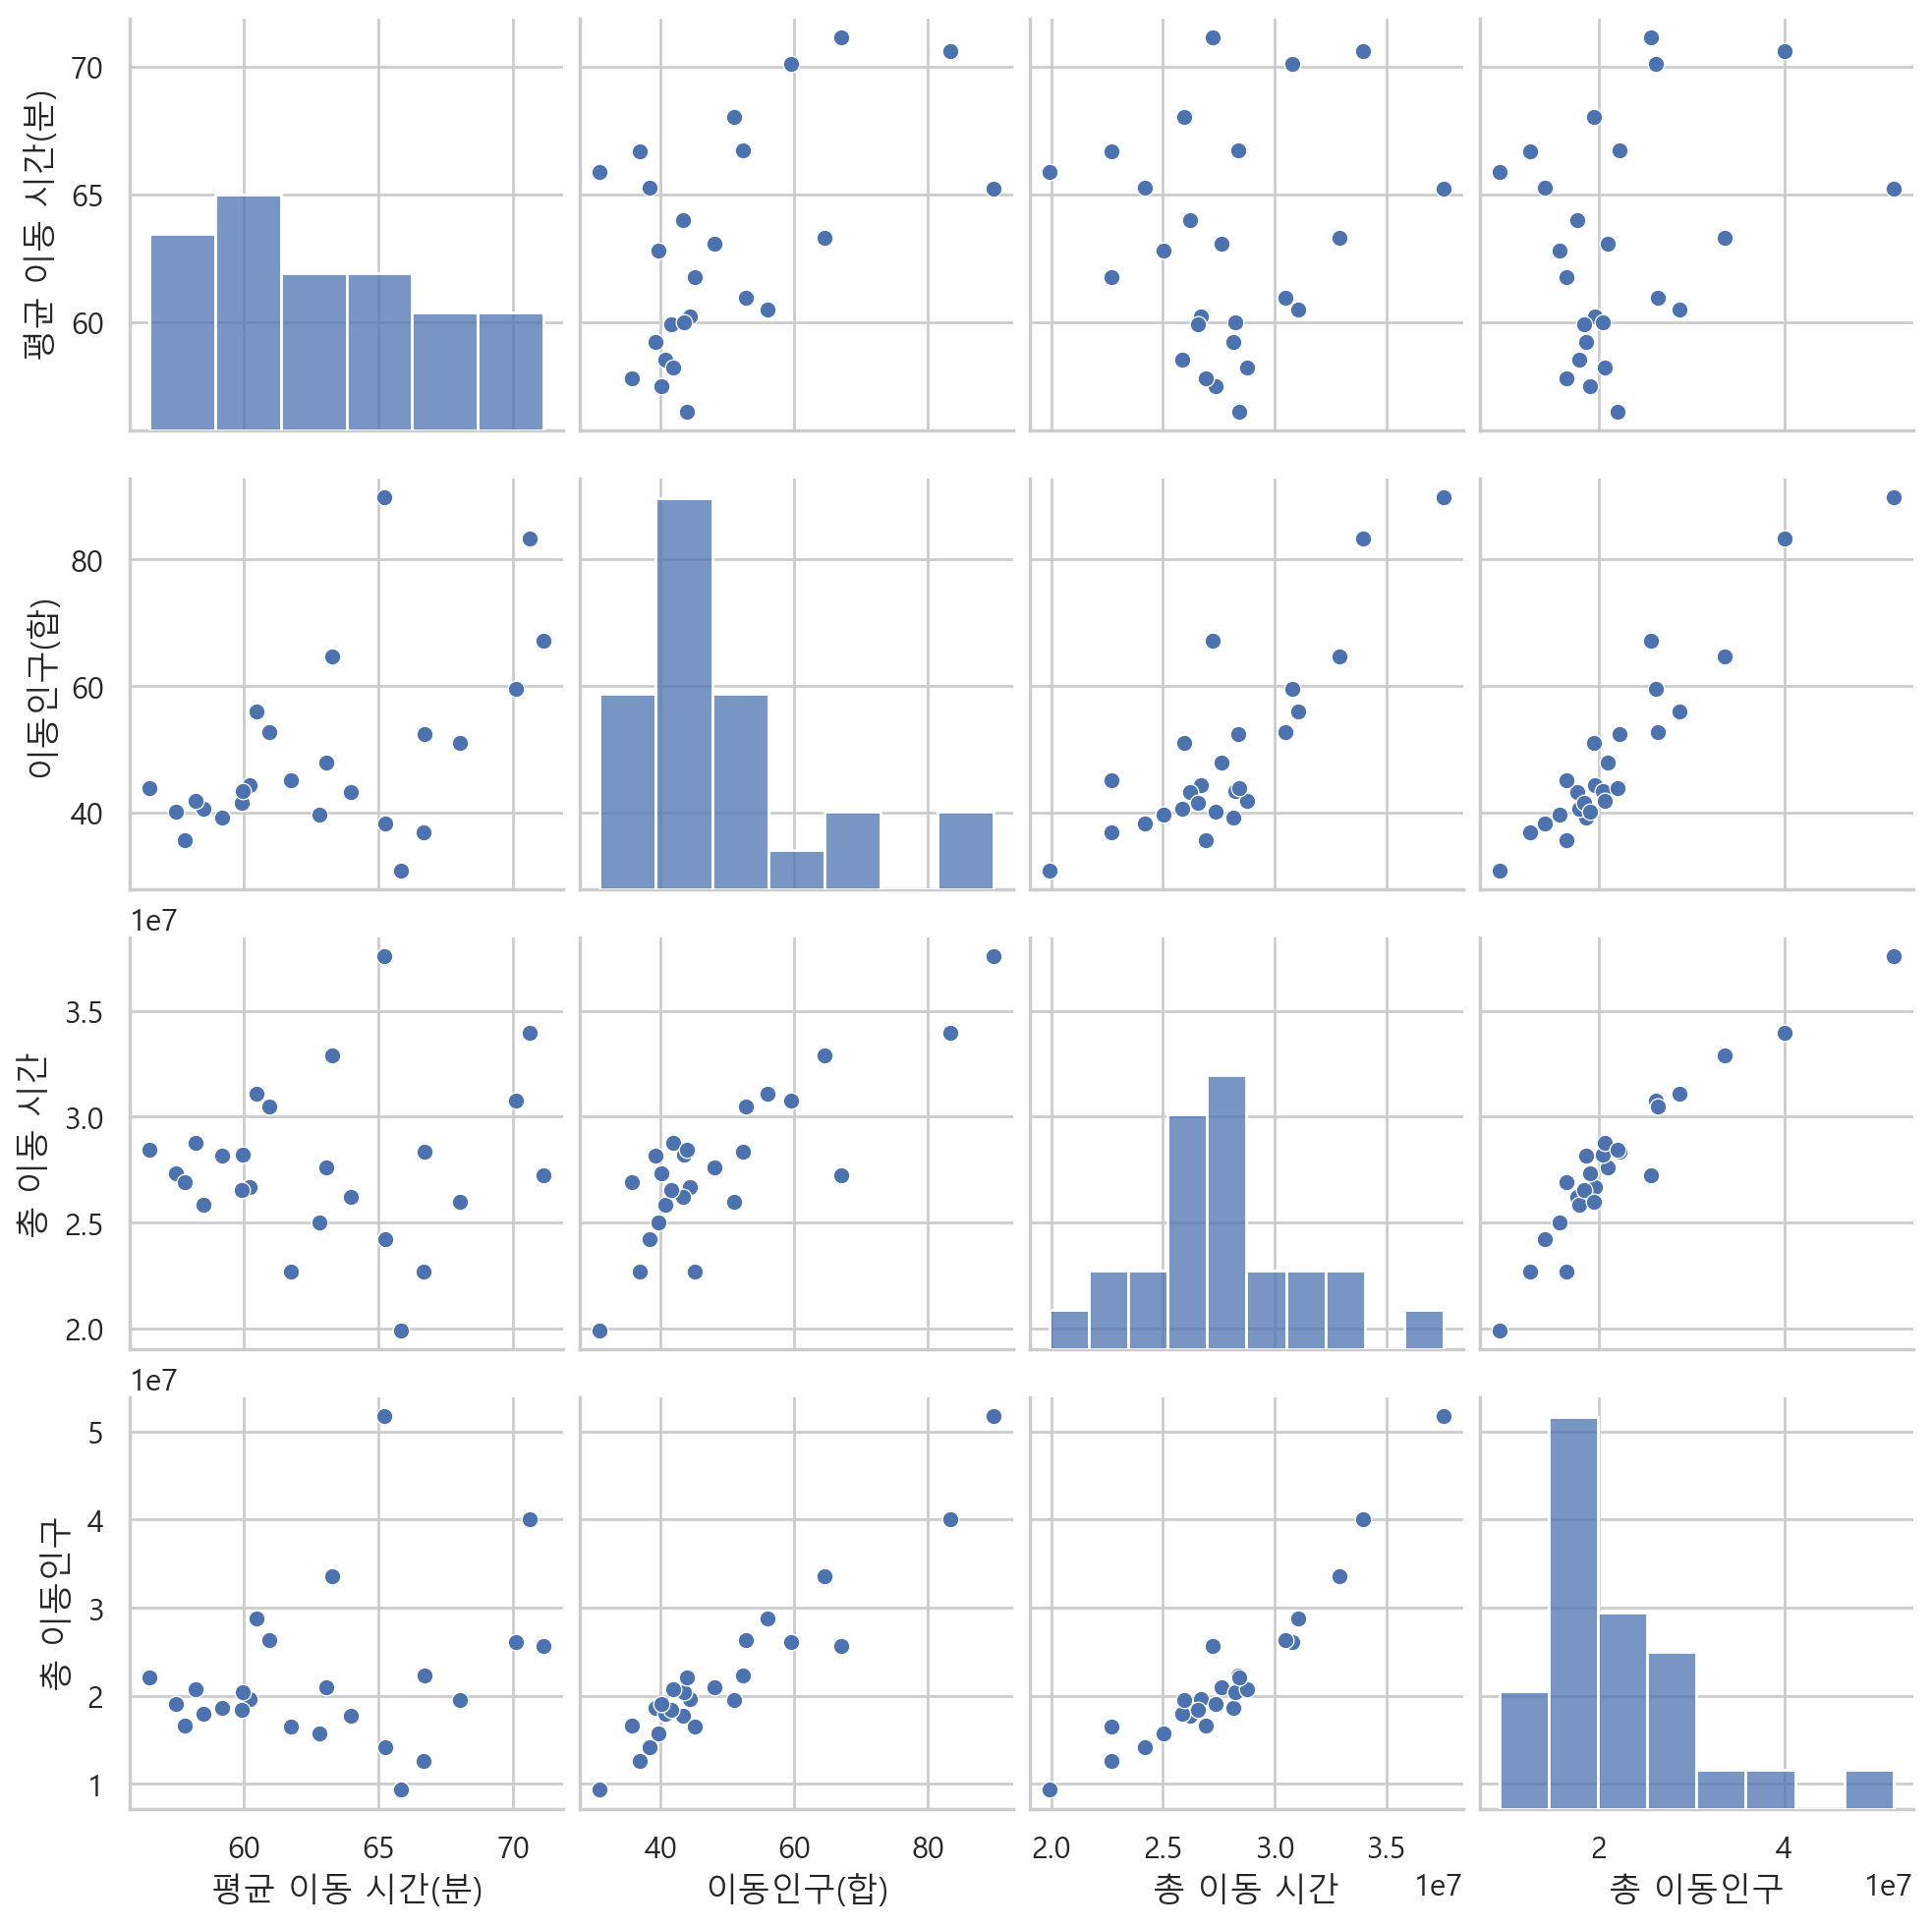

In [141]:
# 주석
# 데이터 시각화
sns.pairplot(df_seoul_moving)
plt.show()

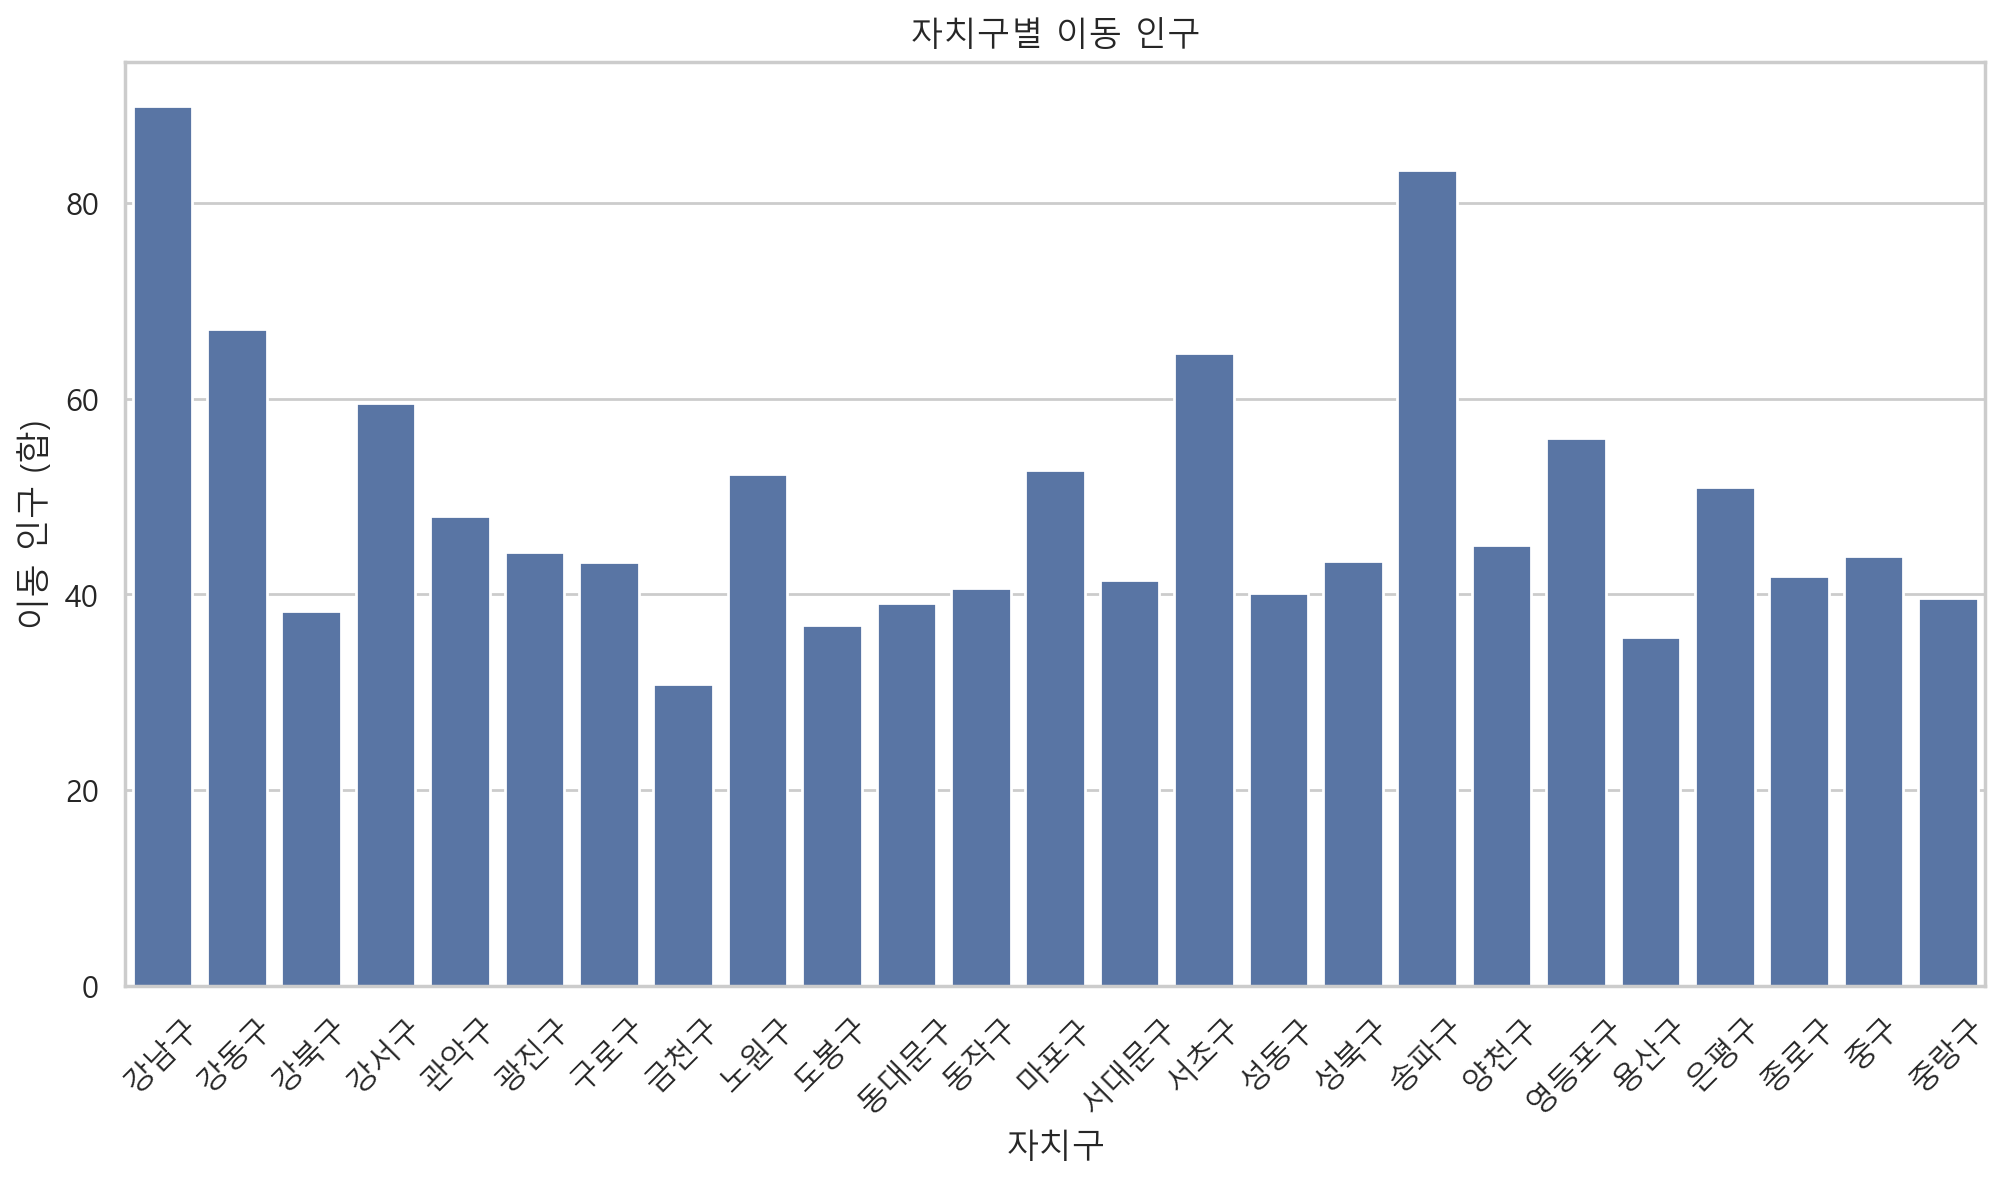

In [143]:
# 주석
# 자치구별 이동 인구 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='이동인구(합)', data=df_seoul_moving)
plt.xticks(rotation=45)
plt.title('자치구별 이동 인구')
plt.xlabel('자치구')
plt.ylabel('이동 인구 (합)')
plt.show()



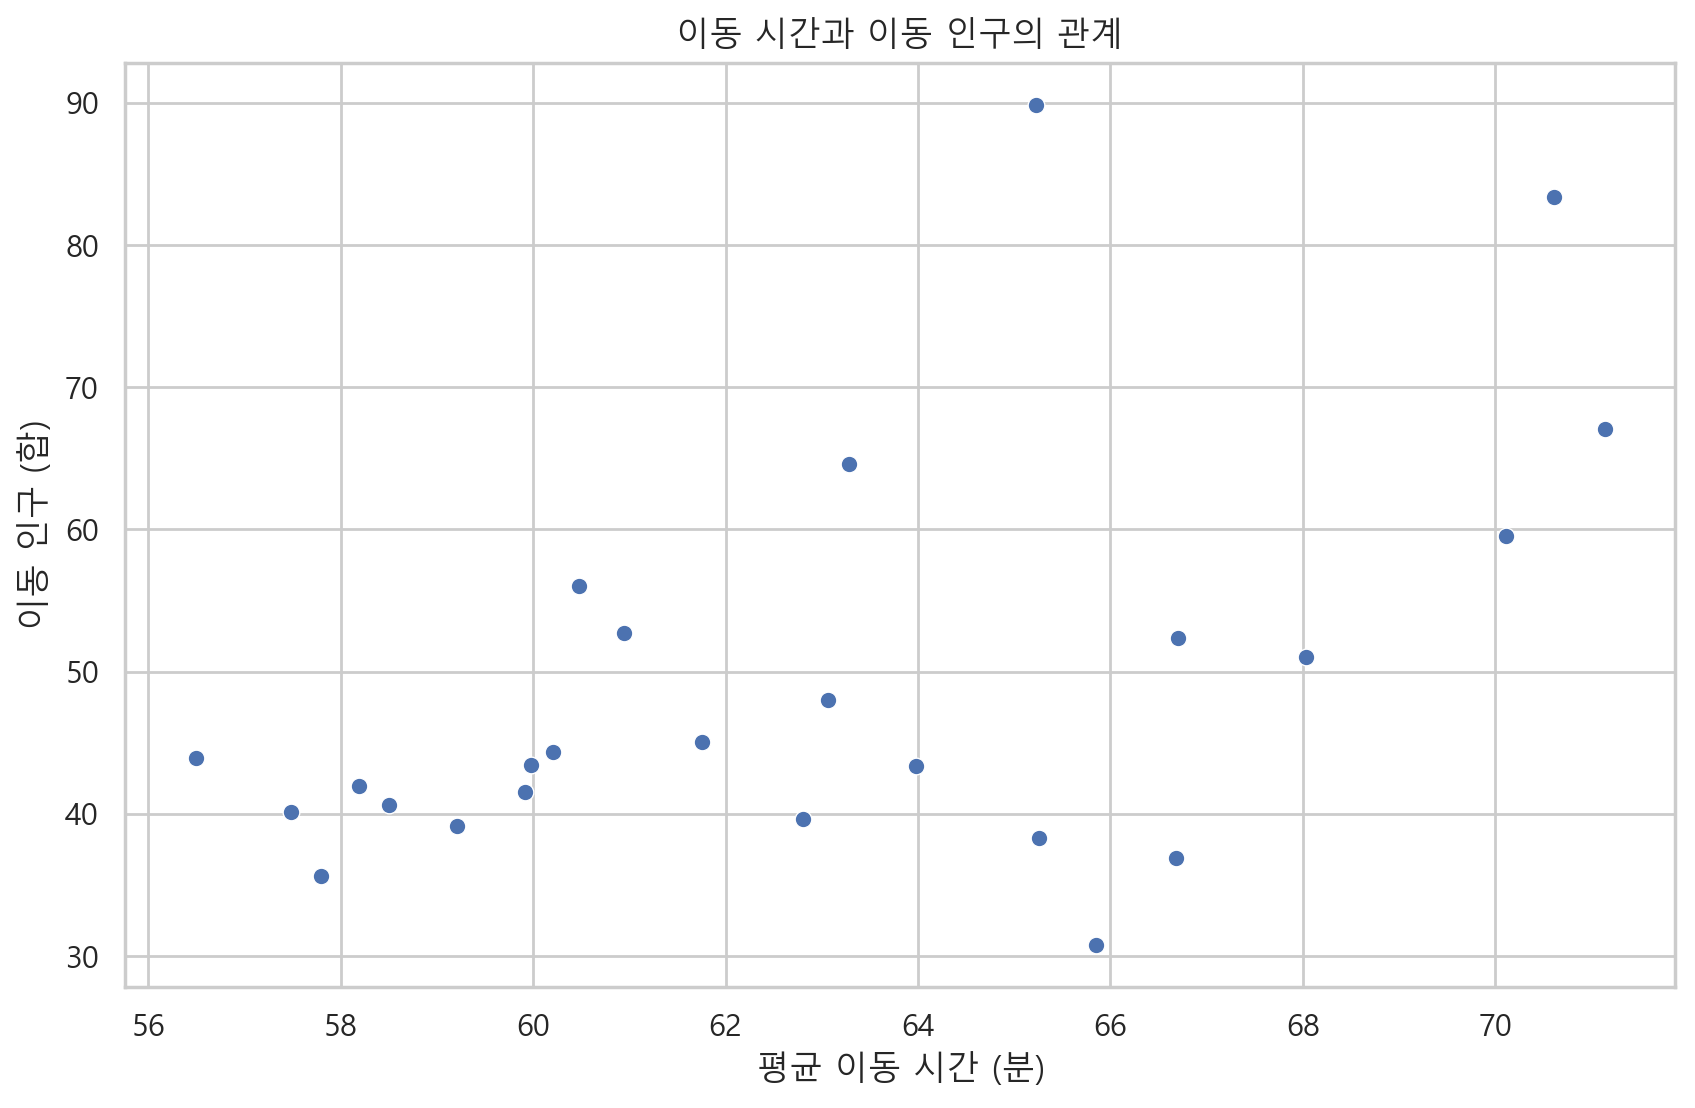

In [145]:
# 주석
# 이동 시간과 이동 인구의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='평균 이동 시간(분)', y='이동인구(합)', data=df_seoul_moving)
plt.title('이동 시간과 이동 인구의 관계')
plt.xlabel('평균 이동 시간 (분)')
plt.ylabel('이동 인구 (합)')
plt.show()

In [ ]:
# 위 시각화를 통해 알게된 사실을 정리해 보세요.


